In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
DataHujan = pd.read_csv('DataCurahHujanSudahCleaning.csv')

In [3]:
DataHujan

,Curah Hujan,Suhu,Kelembapan,Kategori
0,1.3,20.4,89,Rendah
1,14.0,21.4,86,Rendah
2,21.6,21.9,79,Rendah
3,2.0,20.9,87,Rendah
4,8.0,20.0,93,Rendah
...,...,...,...,...
327,0.0,21.3,91,Rendah
328,5.0,20.6,95,Rendah
329,8.5,21.0,92,Rendah
330,14.5,21.1,90,Rendah


In [4]:
## Kalau mau konversi Kategori ke Angka Pakai
data = DataHujan.copy()
data['Kategori'] = data['Kategori'].map({'Rendah':0,'Sedang':1})
data

,Curah Hujan,Suhu,Kelembapan,Kategori
0,1.3,20.4,89,0
1,14.0,21.4,86,0
2,21.6,21.9,79,0
3,2.0,20.9,87,0
4,8.0,20.0,93,0
...,...,...,...,...
327,0.0,21.3,91,0
328,5.0,20.6,95,0
329,8.5,21.0,92,0
330,14.5,21.1,90,0


In [5]:
#optional
datanew = pd.get_dummies(data, columns=['Kategori'], drop_first=True)

In [6]:
datanew


,Curah Hujan,Suhu,Kelembapan,Kategori_1
0,1.3,20.4,89,0
1,14.0,21.4,86,0
2,21.6,21.9,79,0
3,2.0,20.9,87,0
4,8.0,20.0,93,0
...,...,...,...,...
327,0.0,21.3,91,0
328,5.0,20.6,95,0
329,8.5,21.0,92,0
330,14.5,21.1,90,0


In [7]:
datanew.describe()

,Curah Hujan,Suhu,Kelembapan,Kategori_1
count,332.000000,332.000000,332.000000,332.000000
mean,10.572289,21.395482,86.888554,0.006024
std,17.141100,0.818892,6.304191,0.077498
min,0.000000,18.300000,58.000000,0.000000
25%,0.000000,20.900000,83.750000,0.000000
50%,2.950000,21.400000,88.000000,0.000000
75%,14.600000,22.000000,91.000000,0.000000
max,124.000000,24.400000,100.000000,1.000000


In [8]:
y = data['Curah Hujan']
x1 = data[['Suhu','Kelembapan','Kategori']]

In [23]:
x = sm.add_constant(x1)
hasil = sm.OLS(y,x).fit()

In [10]:
hasil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Curah Hujan   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     48.75
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           4.43e-26
Time:                        21:17:20   Log-Likelihood:                -1352.8
No. Observations:                 332   AIC:                             2714.
Df Residuals:                     328   BIC:                             2729.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5665     34.588      0.913      0.362     -36.476      99.609
Suhu          -3.0728      1.179     -2.607      0.010      -5.391      -0.754
Kelembapan     0.5085      0.153      3.317      0.001       0.207       0.810
Kategori      94.4121     10.273      9.191      0.000      74.204     114.621
==============================================================================
Omnibus:                      141.102   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.832
Skew:                           1.955   Prob(JB):                    8.54e-101
Kurtosis:                       7.246   Cond. No.                     3.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#data.pop('Suhu')
data

,Curah Hujan,Suhu,Kelembapan,Kategori
0,1.3,20.4,89,0
1,14.0,21.4,86,0
2,21.6,21.9,79,0
3,2.0,20.9,87,0
4,8.0,20.0,93,0
...,...,...,...,...
327,0.0,21.3,91,0
328,5.0,20.6,95,0
329,8.5,21.0,92,0
330,14.5,21.1,90,0


In [18]:
y = data['Curah Hujan']
x1 = data[['Kelembapan','Kategori']]

In [19]:
x = sm.add_constant(x1)
hasil = sm.OLS(y,x).fit()

In [14]:
hasil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Curah Hujan   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     68.52
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.33e-25
Time:                        21:17:20   Log-Likelihood:                -1356.2
No. Observations:                 332   AIC:                             2718.
Df Residuals:                     329   BIC:                             2730.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.9492     11.068     -4.874      0.000     -75.723     -32.175
Kelembapan     0.7359      0.127      5.788      0.000       0.486       0.986
Kategori      96.0291     10.344      9.284      0.000      75.681     116.377
==============================================================================
Omnibus:                      144.965   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.273
Skew:                           2.001   Prob(JB):                    9.40e-107
Kurtosis:                       7.392   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

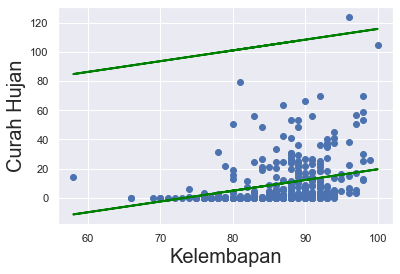

In [21]:
plt.scatter(data['Kelembapan'],y)
yhat_sedang= -53.9492 + 0.7359*data['Kelembapan'] + 96.0291 
yhat_rendah= -53.9492 + 0.7359*data['Kelembapan']  
fig = plt.plot(data['Kelembapan'],yhat_sedang, lw=2, c='green')
fig = plt.plot(data['Kelembapan'],yhat_rendah, lw=2, c='green')
plt.xlabel('Kelembapan',fontsize= 20)
plt.ylabel('Curah Hujan',fontsize= 20)
plt.show()

In [ ]:
##SumberdataBMKG

# Penambahan Data Baru

In [24]:
x

,const,Kelembapan,Kategori
0,1.0,89,0
1,1.0,86,0
2,1.0,79,0
3,1.0,87,0
4,1.0,93,0
...,...,...,...
327,1.0,91,0
328,1.0,95,0
329,1.0,92,0
330,1.0,90,0


In [25]:
data_baru = pd.DataFrame({'const':1,'Kelembapan': [90,87,89] ,'Kategori':[0,0,1]})


In [26]:
data_baru = data_baru[['const', 'Kelembapan', 'Kategori']]
data_baru

,const,Kelembapan,Kategori
0,1,90,0
1,1,87,0
2,1,89,1


In [27]:
data_baru.rename(index={0:'8 Februari 2022',1:'9 Februari 2022', 2:'10 Februari 2022'})

,const,Kelembapan,Kategori
8 Februari 2022,1,90,0
9 Februari 2022,1,87,0
10 Februari 2022,1,89,1


In [28]:
predictions = hasil.predict(data_baru)
predictions

0     12.283575
1     10.075816
2    107.576724
dtype: float64

In [29]:
predictionsdf=pd.DataFrame({'Predictions':predictions})
gabung = data_baru.join(predictionsdf)
gabung

,const,Kelembapan,Kategori,Predictions
0,1,90,0,12.283575
1,1,87,0,10.075816
2,1,89,1,107.576724


In [30]:
gabung.rename(index={0:'8 Februari 2022',1:'9 Februari 2022',2:'10 Februari 2022'}) 

,const,Kelembapan,Kategori,Predictions
8 Februari 2022,1,90,0,12.283575
9 Februari 2022,1,87,0,10.075816
10 Februari 2022,1,89,1,107.576724
